In [1]:
# import pandas
import pandas as pd

#load data
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
df_products = pd.read_csv('/datasets/products.csv', sep = ';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
df_departments = pd.read_csv('/datasets/departments.csv', sep = ';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [2]:
# Check for duplicated orders

print('number of duplicates: ', df_orders.duplicated().sum())
print()
df_orders[df_orders.duplicated()]

number of duplicates:  15



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


There are 15 duplicate orders.

In [3]:
# Check for all orders placed Wednesday at 2:00 AM

print(df_orders['order_dow'].value_counts())
print()
print(df_orders['order_hour_of_day'].value_counts())

0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: order_dow, dtype: int64

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: order_hour_of_day, dtype: int64


The documentation does not say which day of the week is 0, and the value counts give no clear indication. I will presume for now that 0 = Monday, which means 2 = Wednesday. 

Since the hour column ranges from 0 - 23, I will assume that 0 = 1 AM, which means 1 = 2 AM.

In [4]:
df_orders[(df_orders['order_dow'] == 2) & (df_orders['order_hour_of_day'] == 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
2412,1687280,186721,22,2,1,8.0
3630,1596235,80214,25,2,1,30.0
5906,90990,25129,32,2,1,10.0
6414,3017131,10221,74,2,1,7.0
6421,2949405,82419,4,2,1,5.0
...,...,...,...,...,...,...
468911,2398512,130651,6,2,1,12.0
470737,560744,204022,22,2,1,2.0
471576,2752323,201031,5,2,1,30.0
475550,2534832,178899,16,2,1,5.0


There are 240 orders on Wednesday at 2:00 AM.

In [5]:
# Remove duplicate orders

df_orders.drop_duplicates(inplace = True)

In [6]:
# Double check for duplicate rows

print('number of duplicates: ', df_orders.duplicated().sum())

number of duplicates:  0


In [7]:
# Double check for duplicate order IDs only

print('number of duplicate order_ids: ', df_orders['order_id'].duplicated().sum())

number of duplicate order_ids:  0


There are no duplicate orders or duplicate order_ids.

### `products` data frame

In [8]:
# Check for fully duplicate rows

print('number of duplicates: ', df_products.duplicated().sum())

number of duplicates:  0


In [9]:
# Check for just duplicate product IDs

print('number of duplicate product_ids: ', df_products['product_id'].duplicated().sum())

number of duplicate product_ids:  0


In [10]:
# Check for just duplicate product names (convert names to lowercase to compare better)

print('number of duplicate product_names: ', df_products['product_name'].str.lower().duplicated().sum())
print()
print(df_products[df_products['product_name'].str.lower().duplicated()].head())
print()
print('number of NaN duplicate product_names: ', df_products['product_name'].isna().sum())

number of duplicate product_names:  1361

     product_id product_name  aisle_id  department_id
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21

number of NaN duplicate product_names:  1258


There are 1361 duplicate prodoucts of which 1258 are NaN.

In [11]:
# Check for duplicate product names that aren't missing

print('number of non-NaN duplicate product_names: ', df_products['product_name'].str.lower().dropna().duplicated().sum())

number of non-NaN duplicate product_names:  104


There are 104 duplicate products not including missing values.

### `departments` data frame

In [12]:
print('number of duplicate rows: ', df_departments.duplicated().sum())
print('number of duplicate department_ids: ', df_departments['department_id'].duplicated().sum())
print('number of duplicate departments: ', df_departments['department'].duplicated().sum())

number of duplicate rows:  0
number of duplicate department_ids:  0
number of duplicate departments:  0


There are no duplicates in df_departments.

### `aisles` data frame

In [13]:
print('number of duplicate rows: ', df_aisles.duplicated().sum())
print('number of duplicate aisle_ids: ', df_aisles['aisle_id'].duplicated().sum())
print('number of duplicate aisles: ', df_aisles['aisle'].duplicated().sum())

number of duplicate rows:  0
number of duplicate aisle_ids:  0
number of duplicate aisles:  0


There are no duplicates in df_aisles.

### `order_products` data frame

In [14]:
# Check for fullly duplicate rows

print('number of duplicate rows: ', df_order_products.duplicated().sum())

number of duplicate rows:  0


There are no duplicate rows.

In [15]:
# Double check for any other tricky duplicates

print('number of duplicate order_ids and product_ids: ', df_order_products.duplicated(subset=['order_id','product_id']).sum())
print()
print('number of duplicate order_ids and add_to_cart_orders: ', df_order_products.duplicated(subset=['order_id','add_to_cart_order']).sum())
print()
print(df_order_products[df_order_products.duplicated(subset=['order_id','add_to_cart_order'])].head())
print()
print('number of duplicate order_ids and add_to_cart_orders: ', df_order_products.dropna().duplicated(subset=['order_id','add_to_cart_order']).sum())

number of duplicate order_ids and product_ids:  0

number of duplicate order_ids and add_to_cart_orders:  766

        order_id  product_id  add_to_cart_order  reordered
64336    1717990       39408                NaN          0
70057     264710       41602                NaN          0
128360   2449164       14386                NaN          0
137029   3347453       30727                NaN          0
137958   2136777       45106                NaN          0

number of duplicate order_ids and add_to_cart_orders:  0


There are no rows with duplicate order_ids and product_ids, which might have been acceptable anyway.

There are 766 rows with duplicate order_ids and add_to_cart_orders, which probably should not occur, but the duplicates are all NaNs. 

## Find and remove missing values


### `products` data frame

In [16]:
# Are all of the missing product names associated with aisle ID 100?

print('number of missing product_names: ', df_products['product_name'].isna().sum())
print('number of missing product_names with aisle_id = 100: ', ((df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)).sum())

number of missing product_names:  1258
number of missing product_names with aisle_id = 100:  1258


Yes, all of the missing product names are associated with aisle ID 100.

In [17]:
# Are all of the missing product names associated with department ID 21?

print('number of missing product_names: ', df_products['product_name'].isna().sum())
print('number of missing product_names with department_id = 21: ', ((df_products['product_name'].isna()) & (df_products['department_id'] == 21)).sum())

number of missing product_names:  1258
number of missing product_names with department_id = 21:  1258


Yes, all of the missing product names are associated with department ID 21.

In [18]:
# What is this aisle and department?

print(df_aisles[df_aisles['aisle_id'] == 100])
print()
print(df_departments[df_departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


aisle_id of 100 and department_id of 21 both represent missing data.

In [19]:
# Fill missing product names with 'Unknown'

print('number of missing product_names: ', df_products['product_name'].isna().sum())
print()
df_products['product_name'].fillna('Unknown', inplace=True)
print('number of missing product_names: ', df_products['product_name'].isna().sum())
print()
print(df_products[df_products['product_name'] == 'Unknown'])

number of missing product_names:  1258

number of missing product_names:  0

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


All the missing product names have been replaced with "Unknown".

### `orders` data frame

In [20]:
# Are there any missing values where it's not a customer's first order?

print('number of orders with missing values: ', df_orders.isna().any(axis=1).sum())
print()
print("number of orders that are a customer's first order: ", df_orders[df_orders['order_number'] == 1].shape[0])
print()
print(df_orders[df_orders['order_number'] != 1].isna().sum())

number of orders with missing values:  28817

number of orders that are a customer's first order:  28817

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


No, every order with missing values is a customer's first order.

### `order_products` data frame

In [21]:
# What are the min and max values in this column?
# Which column??

pd.set_option('display.float_format', '{:.0f}'.format)
print(df_order_products.describe().loc[['min', 'max']])
pd.reset_option('display.float_format')

     order_id  product_id  add_to_cart_order  reordered
min         4           1                  1          0
max   3421079       49694                 64          1


In [22]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

order_ids_missing_add_to_cart_order = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), 'order_id'].unique()
print(order_ids_missing_add_to_cart_order)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [23]:
# Do all orders with missing values have more than 64 products?

print(df_order_products.isna().sum())
print()
print(df_order_products.groupby('order_id')['product_id'].count().loc[order_ids_missing_add_to_cart_order].describe())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

count     70.000000
mean      75.942857
std       12.898585
min       65.000000
25%       67.000000
50%       71.000000
75%       78.000000
max      127.000000
Name: product_id, dtype: float64


Yes, the minimum number of products for an order with missing values is 65. 

In [24]:
# Replace missing values with 999 and convert column to integer type

df_order_products['add_to_cart_order'].fillna(999, inplace=True)#.astype('int')
df_order_products = df_order_products.astype({'add_to_cart_order': int})

print(df_order_products['add_to_cart_order'].value_counts().get(999, 0))
print()
print(df_order_products.dtypes)


836

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


All missing add_to_cart_order values were replaced with 999 and the column was converted to int type.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [25]:
print(df_orders['order_hour_of_day'].describe())
print()
print(df_orders['order_dow'].describe())

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


Columns order_hour_of_day and order_dow are sensible with ranges from 0 to 23 and 0 to 6, respectively.

### [A2] What time of day do people shop for groceries?

mode for order_hour_of_day:  10



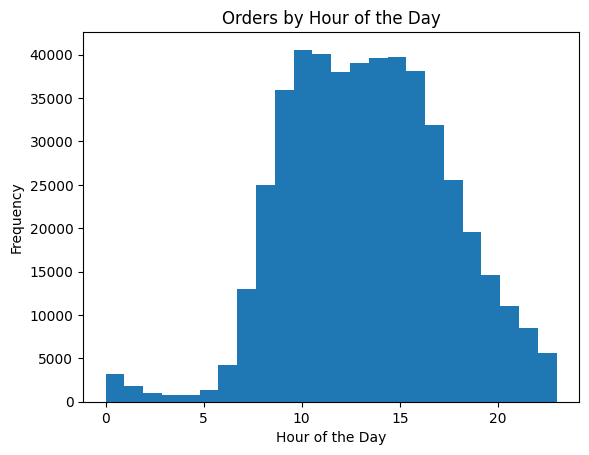

In [26]:
from matplotlib import pyplot as plt

print('mode for order_hour_of_day: ', df_orders['order_hour_of_day'].mode()[0])
print()
plt.hist(df_orders['order_hour_of_day'], bins=24)
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

The most common hour of day for grocery shopping in this data set is 11:00 AM. More generally, shoppers prefer the afternoon with half of the sample shopping between 11:00 AM and 5:00 PM. 

### [A3] What day of the week do people shop for groceries?

mode for order_dow:  0



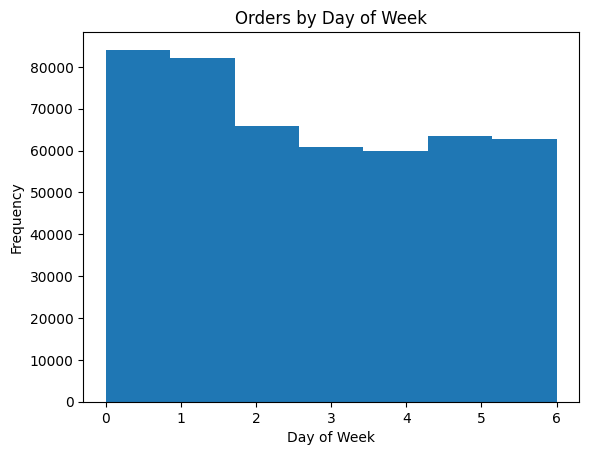


proportion shopping on Monday or Tuesday: 34.72%


In [27]:
print('mode for order_dow: ', df_orders['order_dow'].mode()[0])
print()
plt.hist(df_orders['order_dow'], bins=7)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()
print()
proportion_mon_or_tue = (df_orders['order_dow'].value_counts()[0] + df_orders['order_dow'].value_counts()[1])/df_orders['order_dow'].value_counts().sum()
print(f'proportion shopping on Monday or Tuesday: {proportion_mon_or_tue:.2%}')

The most common day for grocery shopping in this data set is Monday. More generally, shoppers prefer early in the week with neary 35% of the sample shopping on Monday or Tuesday. 

### [A4] How long do people wait until placing another order?

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

mode for days_since_prior_order:  30.0



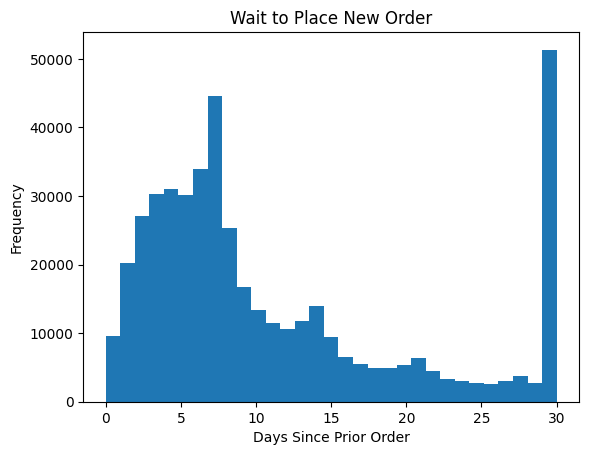


mode for days_since_prior_order (<30):  7.0


In [28]:
print(df_orders['days_since_prior_order'].describe())
print()
print('mode for days_since_prior_order: ', df_orders['days_since_prior_order'].mode()[0])
print()
plt.hist(df_orders['days_since_prior_order'], bins=31)
plt.title('Wait to Place New Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.show()
print()
print('mode for days_since_prior_order (<30): ', df_orders['days_since_prior_order'].loc[df_orders['days_since_prior_order'] < 30].mode()[0])

The most common wait to place an order in this data set is 30 days. However, the distribution of days since prior order is bimodal with a second peak at 7 days. The extremely high frequency at 30 days suggests that it is not a natural part of the distribution. It probably represents 30 days or more. If so, the most common wait is almost certainly 7 days. Either way, half of the shoppers in this sample waited between 4 and 15 days to place another order.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

count    65833.000000
mean        13.442772
std          4.258655
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         23.000000
Name: order_hour_of_day, dtype: float64



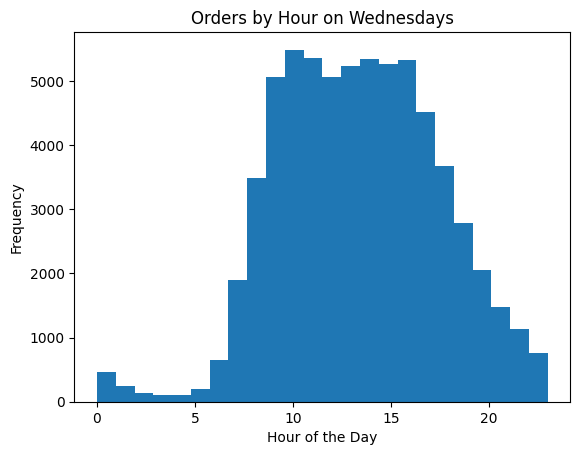


count    63488.000000
mean        13.377504
std          4.245720
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         23.000000
Name: order_hour_of_day, dtype: float64



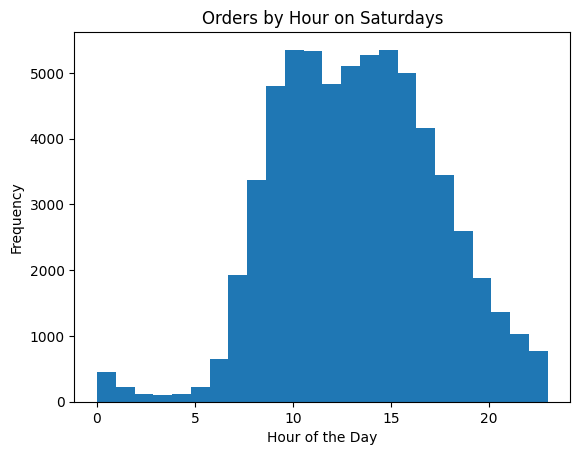

In [29]:
wed_orders = df_orders['order_hour_of_day'].loc[df_orders['order_dow'] == 2]
sat_orders = df_orders['order_hour_of_day'].loc[df_orders['order_dow'] == 5]

print(wed_orders.describe())
print()
plt.hist(wed_orders, bins=24)
plt.title('Orders by Hour on Wednesdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()
print()
print(sat_orders.describe())
print()
plt.hist(sat_orders, bins=24)
plt.title('Orders by Hour on Saturdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

No, the distributions are almost identical. They share the same basic shape and precisely the same quartiles. Even their means (Wednesday = 13.44, Saturday = 13.37)  and standard deviations (Wednesday = 4.26, Saturday = 4.25) are virtually identical. Both distributions are approximately unimodal with plateaus between around 10:00 AM and 5:00 PM. Order activity is almost non-existent prior to 8:00 AM and gradually declines at night after the plateau. 

### [B2] What's the distribution for the number of orders per customer?

In [30]:
# Compare two possible estimates of the number of orders per customer

orders_per_customer_count = df_orders.groupby('user_id')['order_number'].count()
orders_per_customer_max = df_orders.groupby('user_id')['order_number'].max()

orders_per_customer = pd.merge(
    orders_per_customer_count, 
    orders_per_customer_max, 
    on='user_id', 
    suffixes=('_count', '_max')
)

orders_per_customer = orders_per_customer.reset_index()

print(orders_per_customer)

        user_id  order_number_count  order_number_max
0             2                   2                 4
1             4                   2                 6
2             5                   1                 4
3             6                   2                 4
4             7                   2                19
...         ...                 ...               ...
157432   206203                   1                 2
157433   206206                   7                66
157434   206207                   5                14
157435   206208                   9                34
157436   206209                   2                13

[157437 rows x 3 columns]


The meaning of the order_number variable is unclear. It is routinely higher than the total number of orders placed by a given customer in this data set. If it denotes the number of times each customer has placed an order, it must include additional orders I cannot access. Using the maximum order_number for each customer should provide the largest estimate for their total orders. Alternatively, counting the orders in this data set provides the lowest estimate. If I had to choose one estimate without more information, I would go with the data at hand and focus on the order counts. However, I will explore both distributions. 

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_number_count, dtype: float64

mode for order count:  1



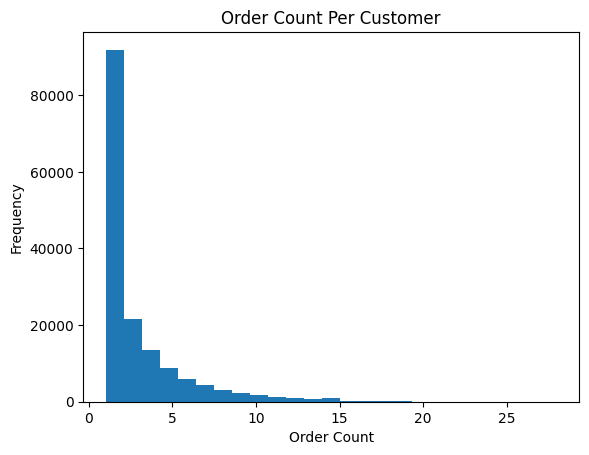


count    157437.000000
mean         15.577571
std          17.215517
min           1.000000
25%           4.000000
50%           9.000000
75%          20.000000
max         100.000000
Name: order_number_max, dtype: float64

mode for maximum order_number:  4



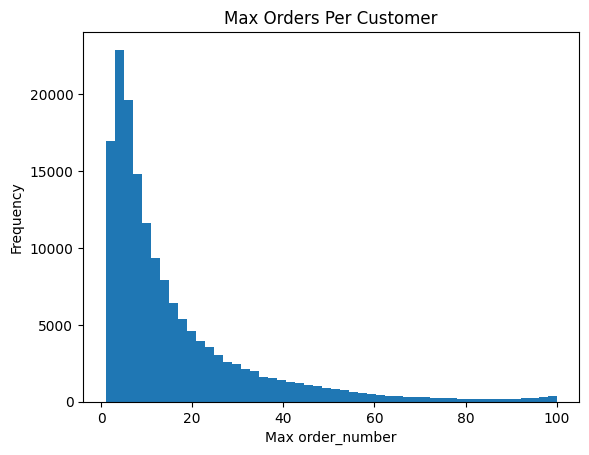

In [31]:
# Examine the distributions of the two estimates

print(orders_per_customer['order_number_count'].describe())
print()
print('mode for order count: ', orders_per_customer['order_number_count'].mode()[0])
print()
plt.hist(orders_per_customer_count, bins=25)
plt.title('Order Count Per Customer')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()
print()

print(orders_per_customer['order_number_max'].describe())
print()
print('mode for maximum order_number: ', orders_per_customer['order_number_max'].mode()[0])
print()
plt.hist(orders_per_customer_max, bins=50)
plt.title('Max Orders Per Customer')
plt.xlabel('Max order_number')
plt.ylabel('Frequency')
plt.show()

The two distributions are quite simliar in overall shape. They are extremely right-skewed, showing that customers tend to make relatively few orders by either measure while decreasingly many customers make more orders. Order counts (mean = 3.04, median = 2, mode = 1, standard deviation = 2.75) are smaller and less spread out than maximum order-numbers (mean = 15.58, median = 9, mode = 4, standard deviation = 17.21). Half of customers make between 1 and 4 orders according to order counts and between 4 and 20 orders according to maximium order_numbers. 

### [B3] What are the top 20 popular products (display their id and name)?

In [32]:
top_20 = df_order_products['product_id'].value_counts().head(20).index.tolist()
top_20_names = [df_products.loc[df_products['product_id'] == x, 'product_name'].values[0] for x in top_20]
print(pd.DataFrame({"product_id": top_20, "product_name": top_20_names}))

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


The top 20 most popular products are listed above.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: order_id, dtype: float64

mode for items per order:  5



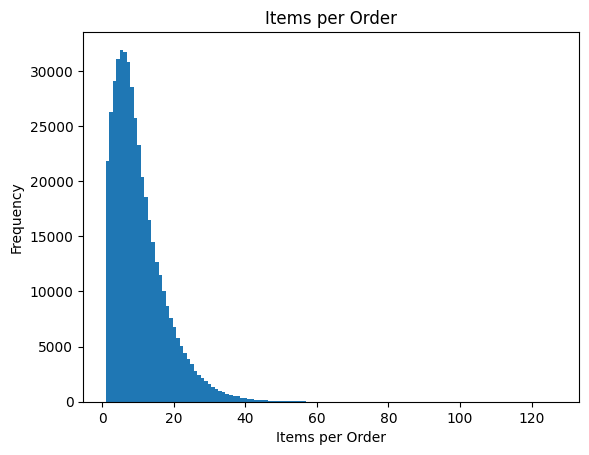

In [33]:
order_freqs = df_order_products['order_id'].value_counts()
print(order_freqs.describe())
print()
print('mode for items per order: ', order_freqs.mode()[0])
print()
plt.hist(order_freqs, bins=128)
plt.title('Items per Order')
plt.xlabel('Items per Order')
plt.ylabel('Frequency')
plt.show()

The distribution of items per order is extremely right-skewed with mean = 10.10, median = 8, and mode = 5. Orders range from 1 to 127 items and 50% of orders contain between 5 and 8 items. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [34]:
top_20_reordered = df_order_products.groupby('product_id')['reordered'].sum().sort_values(ascending=False).head(20).index.tolist()
top_20_reordered_names = [df_products.loc[df_products['product_id'] == x, 'product_name'].values[0] for x in top_20_reordered]
print(pd.DataFrame({"product_id": top_20_reordered, "product_name": top_20_reordered_names}))

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        27845        Organic Whole Milk
7        47626               Large Lemon
8        27966       Organic Raspberries
9        16797              Strawberries
10       26209                     Limes
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       49683            Cucumber Kirby
15       28204        Organic Fuji Apple
16        8277  Apple Honeycrisp Organic
17       39275       Organic Blueberries
18        5876             Organic Lemon
19       49235       Organic Half & Half


The top 20 items that are reordered most frequently are listed above.

### [C3] For each product, what proportion of its orders are reorders?

In [35]:
print(df_order_products.groupby('product_id')['reordered'].mean().reset_index(name='reorder_proportion'))

       product_id  reorder_proportion
0               1            0.564286
1               2            0.000000
2               3            0.738095
3               4            0.510204
4               7            0.500000
...           ...                 ...
45568       49690            0.800000
45569       49691            0.430556
45570       49692            0.416667
45571       49693            0.440000
45572       49694            0.333333

[45573 rows x 2 columns]


The proportion of products ordered that are reorders for each product is in the reorder_proportion column.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [36]:
# Find the number of reorders and orders for each order_id

df_user_orders = df_orders.iloc[:, :2].copy()
reorders_by_order_id_sum = df_order_products.groupby('order_id')['reordered'].sum().reset_index()
reorders_by_order_id_count = df_order_products.groupby('order_id')['reordered'].count().reset_index()

reorders_by_order_id = pd.merge(
    reorders_by_order_id_sum, 
    reorders_by_order_id_count, 
    on='order_id', 
    suffixes=('_sum', '_count')
)

df_user_orders = pd.merge(
    df_user_orders, 
    reorders_by_order_id, 
    on='order_id', 
)

df_user_orders.columns = ['order_id', 'user_id', 'reorders', 'orders']

print(df_user_orders.sort_values('user_id'))

        order_id  user_id  reorders  orders
298007    738281        2         1      13
222740   2168274        2         0      13
316900   2030307        4         0       2
207635    157374        5         8      12
13886    2086598        6         0       4
...          ...      ...       ...     ...
156681    447879   206208         4       4
392186   2573371   206208         8      14
39832    2079142   206208        21      22
447642   2977660   206209         4       9
293040    688306   206209         4      16

[450046 rows x 4 columns]


In [37]:
# Find the number of reorders, number of total orders, and proportion of total orders reordered for each user_id

df_user_orders_reorders = df_user_orders.groupby('user_id')['reorders'].sum().reset_index()
df_user_orders_orders = df_user_orders.groupby('user_id')['orders'].sum().reset_index()

df_user_reorders = pd.merge(
    df_user_orders_reorders, 
    df_user_orders_orders, 
    on='user_id', 
)

df_user_reorders['reorder_proportion'] = df_user_reorders['reorders']/df_user_reorders['orders']

print(df_user_reorders.sort_values('user_id'))

        user_id  reorders  orders  reorder_proportion
0             2         1      26            0.038462
1             4         0       2            0.000000
2             5         8      12            0.666667
3             6         0       4            0.000000
4             7        13      14            0.928571
...         ...       ...     ...                 ...
149621   206203         6      27            0.222222
149622   206206        15      21            0.714286
149623   206207        41      46            0.891304
149624   206208        87     125            0.696000
149625   206209         8      25            0.320000

[149626 rows x 4 columns]


The proportion of products ordered that are reorders for each customer is in the reorder_proportion column.

### [C5] What are the top 20 items that people put in their carts first? 

In [38]:
first_cart_products = df_order_products[df_order_products['add_to_cart_order'] == 1].groupby('product_id').size().reindex(df_order_products['product_id'].unique(), fill_value=0)
print(first_cart_products.sort_values(ascending=False).reset_index(name='frequency_first_in_cart').head(20))

    product_id  frequency_first_in_cart
0        24852                    15562
1        13176                    11026
2        27845                     4363
3        21137                     3946
4        47209                     3390
5        21903                     3336
6        47766                     3044
7        19660                     2336
8        16797                     2308
9        27966                     2024
10       44632                     1914
11       49235                     1797
12       47626                     1737
13         196                     1733
14       38689                     1397
15       26209                     1370
16       12341                     1340
17        5785                     1310
18       27086                     1309
19       43352                     1246


The top 20 items that people put in their carts first are listed above.